# Multiclass Classification Problem

In [1]:
# loading the reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


The argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

In [2]:
len(train_data), len(test_data)

(8982, 2246)

Each example is a list of integers (word indices)

In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
# vectorize the data
import numpy as np

#One-hot encode your lists to turn them into vectors of 0s and 1s.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
#vectorize the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
#model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two things you should note about this architecture: 

 You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.<br>
 The last layer uses a softmax activation. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is **categorical_crossentropy**. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output some-
thing as close as possible to the true labels

In [9]:
#compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [10]:
#setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
#training the model
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
16/16 [==============================] - 4s 129ms/step - loss: 2.7024 - accuracy: 0.4838 - val_loss: 1.8195 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 57ms/step - loss: 1.5182 - accuracy: 0.6878 - val_loss: 1.3527 - val_accuracy: 0.7010
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.1514 - accuracy: 0.7423 - val_loss: 1.1700 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.9371 - accuracy: 0.7903 - val_loss: 1.0691 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.7781 - accuracy: 0.8340 - val_loss: 1.0027 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6417 - accuracy: 0.8634 - val_loss: 0.9609 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5377 - accuracy: 0.8877 - val_loss: 0.9140 - val_accuracy: 0.8090
Epoch 8/20
1

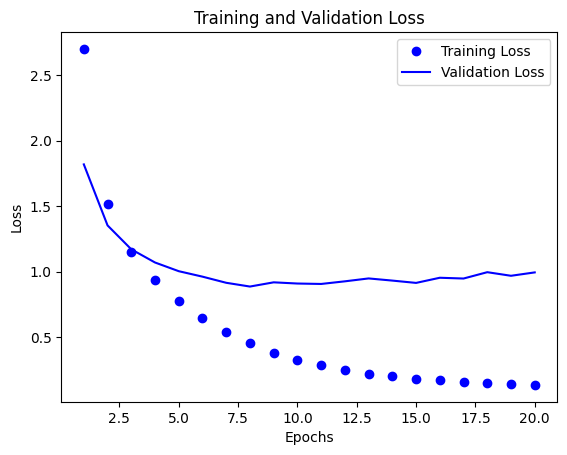

In [12]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

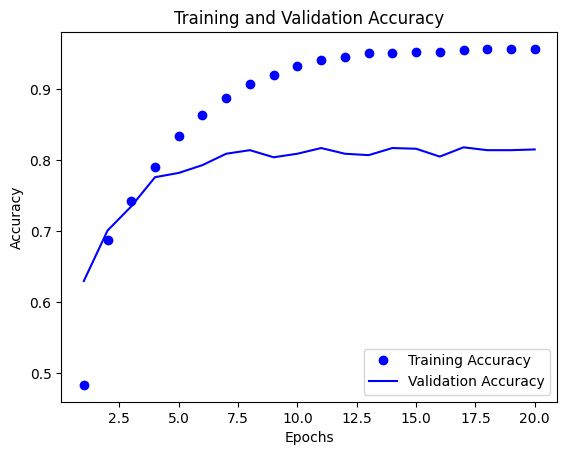

In [13]:
#plotting the training and validation accuracy
plt.clf() #clear figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from scratch for nine epochs and then evaluate it on the test set

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

history = model.fit(partial_x_train, partial_y_train,
                    epochs=9, batch_size=512,
                    validation_data=(x_val,y_val)
                    )

Epoch 1/9
16/16 [==============================] - 3s 96ms/step - loss: 2.8571 - accuracy: 0.4960 - val_loss: 1.9390 - val_accuracy: 0.6050
Epoch 2/9
16/16 [==============================] - 1s 60ms/step - loss: 1.6304 - accuracy: 0.6649 - val_loss: 1.4287 - val_accuracy: 0.6750
Epoch 3/9
16/16 [==============================] - 1s 56ms/step - loss: 1.2396 - accuracy: 0.7294 - val_loss: 1.2302 - val_accuracy: 0.7180
Epoch 4/9
16/16 [==============================] - 1s 54ms/step - loss: 1.0050 - accuracy: 0.7814 - val_loss: 1.0963 - val_accuracy: 0.7480
Epoch 5/9
16/16 [==============================] - 1s 52ms/step - loss: 0.8292 - accuracy: 0.8232 - val_loss: 1.0068 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 53ms/step - loss: 0.6933 - accuracy: 0.8557 - val_loss: 0.9678 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 53ms/step - loss: 0.5771 - accuracy: 0.8809 - val_loss: 0.9202 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

In [16]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 6ms/step - loss: 0.9470 - accuracy: 0.7876


In [17]:
#predictions on new data
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [18]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [19]:
np.sum(predictions[0])

1.0

The largest entry is the predicted class—the class with the highest probability:

In [20]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

Another way to encode the labels would be to cast them as an integer tensor, like this:

In [21]:
y_train = np.array(train_labels) 
y_test = np.array(test_labels)

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The only thing this approach would change is the choice of the loss function. The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use **sparse_categorical_
crossentropy**:

In [23]:
#compiling the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [24]:
#setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
#training the model
history = model.fit(partial_x_train,partial_y_train,
                    epochs=9, batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/9
16/16 [==============================] - 3s 89ms/step - loss: 2.8813 - accuracy: 0.4811 - val_loss: 1.9521 - val_accuracy: 0.6340
Epoch 2/9
16/16 [==============================] - 1s 55ms/step - loss: 1.5924 - accuracy: 0.6812 - val_loss: 1.3806 - val_accuracy: 0.7000
Epoch 3/9
16/16 [==============================] - 1s 52ms/step - loss: 1.1748 - accuracy: 0.7444 - val_loss: 1.1843 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 1s 57ms/step - loss: 0.9577 - accuracy: 0.7983 - val_loss: 1.0995 - val_accuracy: 0.7530
Epoch 5/9
16/16 [==============================] - 1s 54ms/step - loss: 0.8089 - accuracy: 0.8246 - val_loss: 1.0292 - val_accuracy: 0.7810
Epoch 6/9
16/16 [==============================] - 1s 58ms/step - loss: 0.6792 - accuracy: 0.8564 - val_loss: 0.9510 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 1s 55ms/step - loss: 0.5751 - accuracy: 0.8770 - val_loss: 0.9194 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [26]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 6ms/step - loss: 0.9576 - accuracy: 0.7845


In [27]:
#predictions on new data
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [30]:
predictions[0].shape

(46,)

In [31]:
np.argmax(predictions[0])

3

**Here’s what you should take away from this example:** 

 If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.<br>
 In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.<br>
 Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.<br>
 There are two ways to handle labels in multiclass classification: – Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
– Encoding the labels as integers and using the sparse_categorical_crossentropy loss function<br>
 If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers
that are too small.